In [33]:
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end


naive_multiplication (generic function with 1 method)

In [19]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [11]:
using Plots
using DataFrames

# A=rand(10,10);
# B=rand(10,10);
# C=rand(50, 50);
# D=rand(50, 50);
# E=rand(100,100);
# F=rand(100,100);
# G=rand(200,200);
# H=rand(200,200);
# abn=@elapsed naive_multiplication(A,B)
# cdn=@elapsed naive_multiplication(C,D)
# efn=@elapsed naive_multiplication(E,F)
# ghn=@elapsed naive_multiplication(G,H)

# x=[10,50,100,200]
# y=[abn,cdn,efn,ghn]

df=DataFrame()
df[:size] = Int32[]
df[:typee] = String[]
df[:time] = Float64[] 
for size=50:50:600
    for typee=["naive", "better", "gsl"]
        for i=1:10
            A=rand(size,size)
            B=rand(size,size)
            if typee == "naive"
                    push!(df[:size], size)
                    push!(df[:typee], "naive")
                    push!(df[:time], @elapsed naive_multiplication(A,B))
            elseif typee == "better"
                    push!(df[:size], size)
                    push!(df[:typee], "better")
                    push!(df[:time], @elapsed better_multiplication(A,B))
            else typee == "gsl"
                    push!(df[:size], size)
                    push!(df[:typee], "gsl")
                    push!(df[:time], @elapsed A*B)
            end
        end
    end
end
df

,size,typee,time
,Int32,String,Float64
1,50,naive,0.000342098
2,50,naive,0.000439497
3,50,naive,0.000376097
4,50,naive,0.000403197
5,50,naive,0.000393597
6,50,naive,0.000341498
7,50,naive,0.000400897
8,50,naive,0.000366698
9,50,naive,0.000471397


In [20]:
using Statistics
using Plots

dfg=by(df, [:size, :typee], avg_time=:time => mean, std_time=:time => std)

,size,typee,avg_time,std_time
,Int32,String,Float64,Float64
1,50,naive,0.000398207,4.39077e-5
2,50,better,0.000245198,4.03029e-5
3,50,gsl,2.43398e-5,1.2076e-5
4,100,naive,0.00348508,0.000128815
5,100,better,0.00190587,8.92305e-5
6,100,gsl,6.61091e-5,3.64915e-5
7,150,naive,0.0189314,0.0158658
8,150,better,0.0062083,0.00029568
9,150,gsl,0.000132879,8.15348e-5


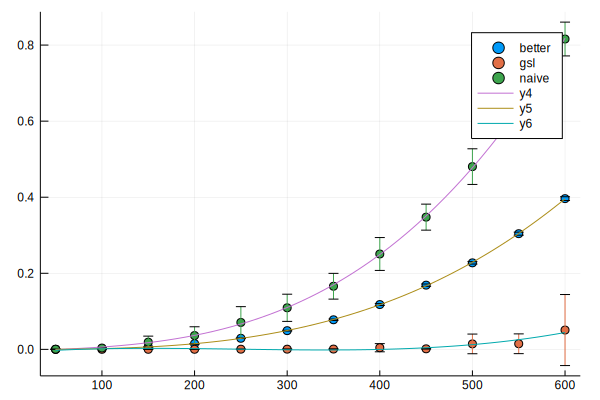

In [21]:
using Polynomials
x=dfg[:size]
y=dfg[:avg_time]
y_err=dfg[:std_time]
yNaive=(dfg[(dfg[:typee].== "naive"),:])[:avg_time]
xNaive=(dfg[(dfg[:typee].== "naive"),:])[:size]

yBetter=(dfg[(dfg[:typee].== "better"),:])[:avg_time]
xBetter=(dfg[(dfg[:typee].== "better"),:])[:size]

yGsl=(dfg[(dfg[:typee].== "gsl"),:])[:avg_time]
xGsl=(dfg[(dfg[:typee].== "gsl"),:])[:size]

fitNaive=polyfit(xNaive,yNaive,3)
fitBetter=polyfit(xBetter,yBetter,3)
fitGsl=polyfit(xGsl,yGsl,3)
xD=50:10:600

scatter(x,y,yerr=y_err, group=dfg[:typee])
plot!(xD, polyval(fitNaive, xD))
plot!(xD, polyval(fitBetter,xD))
plot!(xD,polyval(fitGsl,xD))

In [56]:
using Polynomials
fitNaive

Poly(-0.0045381912131307245 + 7.753337542641897e-5*x - 1.5542987743365653e-7*x^2 + 3.7099366406630213e-9*x^3)

In [57]:
fitBetter

Poly(0.004470955758586145 - 5.426378661723767e-5*x + 1.832754463447758e-7*x^2 + 1.3931928586376508e-9*x^3)

In [58]:
fitGsl

Poly(-0.005142448188888681 + 0.00017695154169337902*x - 7.350893647596804e-7*x^2 + 8.167256293188261e-10*x^3)

In [17]:
input="resultlab3.csv"
myData=DataFrame()
myData=CSV.read(input, delim=",")
dfg=by(myData, :SIZE, avg_n_time=:NAIVE => mean, avg_b_time=:BETTER => mean, avg_g_time=:GSL => mean)

,SIZE,avg_n_time,avg_b_time,avg_g_time
,Int64⍰,Float64,Float64,Float64
1,25,3.61284e5,3.37612e5,5.73555e6
2,50,2.4454e6,2.23912e6,3.47849e5
3,75,4.20104e6,3.40706e6,5.23372e5
4,100,6.00506e6,5.12824e6,8.09787e5
5,125,1.00586e7,9.18657e6,1.40772e6
6,150,1.60812e7,1.38345e7,2.26203e6
7,175,2.66903e7,2.20095e7,3.51359e6
8,200,4.09598e7,3.57463e7,5.7177e6
9,225,5.48086e7,4.65537e7,7.46085e6


In [58]:
using CSV
using DataFrames
using Statistics
using Plots

input="resultlab3.csv"
myData=DataFrame()
myData=CSV.read(input, delim=",")
dfg2=by(myData, :SIZE, avg_n_time=:NAIVE => mean, avg_b_time=:BETTER => mean, avg_g_time=:GSL => mean)

,SIZE,avg_n_time,avg_b_time,avg_g_time
,Int64⍰,Float64,Float64,Float64
1,25,73419.9,69836.0,15118.6
2,50,5.3406e5,4.55025e5,69740.8
3,75,2.34257e6,1.81267e6,3.05255e5
4,100,4.64034e6,4.11885e6,6.68206e5
5,125,9.1487e6,7.95858e6,1.38503e6
6,150,1.49937e7,1.32255e7,2.18539e6
7,175,2.65437e7,2.22814e7,3.61856e6
8,200,4.89432e7,3.97813e7,6.62817e6
9,225,5.72577e7,4.67393e7,7.69354e6


In [60]:
input3="resultlab3optimized.csv"
myData3=DataFrame()
myData3=CSV.read(input3, delim=",")
dfg3=by(myData3, :SIZE, avg_n_time=:NAIVE => mean, avg_b_time=:BETTER => mean, avg_g_time=:GSL => mean)

,SIZE,avg_n_time,avg_b_time,avg_g_time
,Int64⍰,Float64,Float64,Float64
1,25,24188.9,12673.4,17562.4
2,50,1.77448e5,86848.8,1.46485e5
3,75,7.53872e5,3.33186e5,6.19624e5
4,100,1.6783e6,7.4025e5,1.08887e6
5,125,3.23458e6,1.00793e6,2.31377e6
6,150,4.91022e6,1.73169e6,3.06899e6
7,175,7.80065e6,2.83876e6,4.18807e6
8,200,1.12371e7,3.64683e6,5.88187e6
9,225,1.50571e7,4.64629e6,7.68211e6


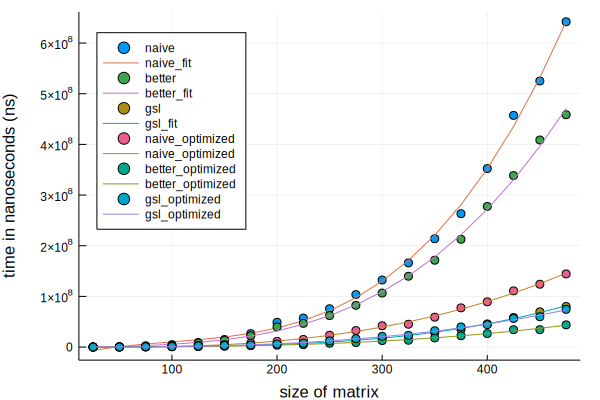

In [62]:
using CSV
using DataFrames
using Statistics
using Plots
using Polynomials

yNaive=dfg2[:avg_n_time]
xNaive=dfg2[:SIZE]

yBetter=dfg2[:avg_b_time]
xBetter=dfg2[:SIZE]

yGsl=dfg2[:avg_g_time]
xGsl=dfg2[:SIZE]

fitNaive=polyfit(xNaive,yNaive,3)
fitBetter=polyfit(xBetter,yBetter,3)
fitGsl=polyfit(xGsl,yGsl,3)

xD=25:25:475

yNaive3=dfg3[:avg_n_time]
xNaive3=dfg3[:SIZE]

yBetter3=dfg3[:avg_b_time]
xBetter3=dfg3[:SIZE]

yGsl3=dfg3[:avg_g_time]
xGsl3=dfg3[:SIZE]

fitNaive3=polyfit(xNaive3,yNaive3,3)
fitBetter3=polyfit(xBetter3,yBetter3,3)
fitGsl3=polyfit(xGsl3,yGsl3,3)

scatter(xD,yNaive,label="naive",legend=:topleft,xlabel="size of matrix",ylabel="time in nanoseconds (ns)")
plot!(xD,polyval(fitNaive,xD),label="naive_fit")
scatter!(xD,yBetter,label="better")
plot!(xD,polyval(fitBetter,xD),label="better_fit")
scatter!(xD,yGsl,label="gsl")
plot!(xD,polyval(fitGsl,xD),label="gsl_fit")

scatter!(xD,yNaive3,label="naive_optimized")
plot!(xD,polyval(fitNaive3,xD),label="naive_optimized")
scatter!(xD,yBetter3,label="better_optimized")
plot!(xD,polyval(fitBetter3,xD),label="better_optimized")
scatter!(xD,yGsl3,label="gsl_optimized")
plot!(xD,polyval(fitGsl3,xD),label="gsl_optimized")

In [30]:
fitNaive

Poly(6.909950266150848e6 - 91243.80084577987*x - 1.1160981298077415*x^2 + 6.015992890590104*x^3)

In [31]:
fitBetter

Poly(4.730993606604865e6 - 81350.45851034152*x + 374.28970868669506*x^2 + 3.6403885002345406*x^3)

In [32]:
fitGsl

Poly(5.394682623013428e6 - 76533.95858104281*x + 310.88715977108603*x^2 + 0.28916496261688057*x^3)